In [3]:
import numpy as np
import matplotlib.pyplot as plt

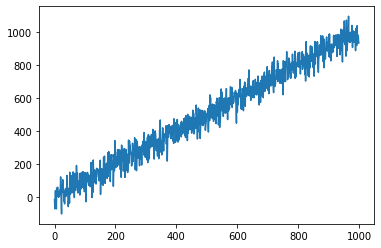

In [4]:
noise=np.random.normal(0,50,1000)
signal = np.linspace(0.0, 1000.0, num=1000)+noise
plt.plot(signal)

In [5]:
def gh_filter(signal, alpha, beta):
    prediction = 0.0
    estimate = 0.0
    sample_time = 1.0
    rate = 5
    out = np.zeros((len(signal), 1))
    velocity = np.zeros((len(signal), 1))
    for i in range(len(signal)):
        # preduction
        rate = rate
        prediction = estimate+rate*sample_time
        #estimate
        rate = rate+beta*(signal[i]-prediction)/sample_time
        estimate=prediction+alpha*(signal[i]-prediction)
        out[i]=estimate
        velocity[i]=rate

    return out, velocity

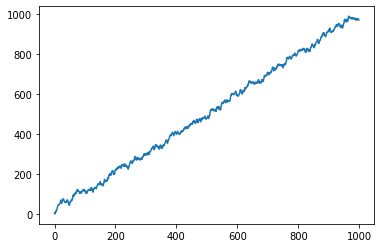

In [6]:
out, rate = gh_filter(signal, 0.1, 0.001)
plt.plot(out)

How can we decide which value to use for alfa and beta, kalman calc it automatical

We have uncertainty of prediction and uncertainty of measurements, uncertainty is the variance of the value around the mean.  
kalman gain is K=P/(P+R)
P variance of prediction base on experience/ knowledge
R variance of sensor (get got/calc from sensor spec)


In [13]:
def kalman1D(signal):
    """
    X=Xp+K*(Z-Xp)
    K: gain
    Xp: predicted
    X: current estimate
    signal
    """
    out = np.zeros((len(signal), 1))
    X=Xp=signal[0]
    P=10
    R=50
    for i in range(len(signal)):
        Xp=X
        K=P/(P+R)
        X=Xp+K*(signal[i]-Xp)
        P=(1-K)*P
        out[i]=X
    return out

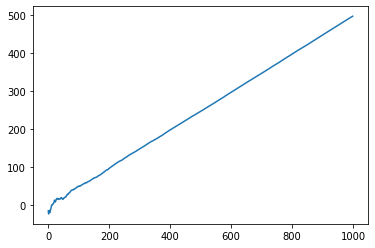

In [14]:
out = kalman1D(signal)
plt.plot(out)